In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_excel(r'C:\Users\USER\OneDrive\Kowsalya R_Capstone_Project\Football_cleaned_data.xlsx')
data

,appearance_id,game_id,player_id_x,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224728_119169,2.224728e+06,119169.000000,2012-07-13 00:00:00.000,Aron Johannsson,DK1,0.000000,0.00000,0.000000,0.000000,...,United States,1996-07-28 14:30:14.634,Centre-Back,Midfield,right,182.508197,6.840030e+06,1.132733e+07,2025-10-03 04:20:34.286,Wasserman
1,2224732_161244,2.224732e+06,161244.000000,2012-07-14 00:00:00.000,Conor O'Brien,DK1,0.000000,0.00000,1.000000,0.000000,...,United States,1996-07-28 14:30:14.634,Centre-Back,Midfield,right,182.508197,6.840030e+06,1.132733e+07,2025-10-03 04:20:34.286,Wasserman
2,2224729_39467,2.224729e+06,39467.000000,2012-07-15 00:00:00.000,Clarence Goodson,DK1,0.000000,0.00000,0.000000,0.000000,...,United States,1996-07-28 14:30:14.634,Centre-Back,Midfield,right,182.508197,6.840030e+06,1.132733e+07,2025-10-03 04:20:34.286,Wasserman
3,2232104_119169,2.232104e+06,119169.000000,2012-07-19 00:00:00.000,Aron Johannsson,ELQ,0.000000,0.00000,0.000000,0.000000,...,United States,1996-07-28 14:30:14.634,Centre-Back,Midfield,right,182.508197,6.840030e+06,1.132733e+07,2025-10-03 04:20:34.286,Wasserman
4,2219794_39475,2.219794e+06,39475.000000,2012-07-22 00:00:00.000,Sacha Kljestan,BESC,0.000000,0.00000,0.000000,0.000000,...,United States,1996-07-28 14:30:14.634,Centre-Back,Midfield,right,182.508197,6.840030e+06,1.132733e+07,2025-10-03 04:20:34.286,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,2224542_119169,2.874689e+06,155510.819638,2016-05-12 05:04:19.911,Fabian Johnson,L1,0.135994,0.00315,0.148333,0.075873,...,United States,1997-08-06 00:00:00.000,Defensive Midfield,Midfield,right,193.000000,4.000000e+06,4.000000e+06,2025-10-03 04:20:34.286,Wasserman
4807,2224542_119169,2.874689e+06,155510.819638,2016-05-12 05:04:19.911,Fabian Johnson,L1,0.135994,0.00315,0.148333,0.075873,...,United States,2001-09-24 00:00:00.000,Central Midfield,Midfield,right,188.000000,2.000000e+06,2.500000e+06,2025-06-30 00:00:00.000,PROSPORT Management
4808,2224542_119169,2.874689e+06,155510.819638,2016-05-12 05:04:19.911,Fabian Johnson,L1,0.135994,0.00315,0.148333,0.075873,...,United States,1987-04-29 00:00:00.000,Central Midfield,Midfield,right,182.000000,3.000000e+05,2.500000e+06,2023-12-31 00:00:00.000,YMU Group
4809,2224542_119169,2.874689e+06,155510.819638,2016-05-12 05:04:19.911,Fabian Johnson,L1,0.135994,0.00315,0.148333,0.075873,...,United States,1992-09-16 00:00:00.000,Left Winger,Attack,both,175.000000,4.000000e+05,6.000000e+05,2023-12-31 00:00:00.000,BR Group Management


# Player Profile and Market Value:

1.What is the correlation between a player's performance metrics (goals, assists, etc.) and their market value?

In [7]:
T1=data[['player_name_x','goals','assists','yellow_cards','red_cards','market_value_in_eur']]
df1=T1.groupby('player_name_x')[['goals','assists','yellow_cards','red_cards','market_value_in_eur']].sum()
df1.corr()

,goals,assists,yellow_cards,red_cards,market_value_in_eur
goals,1.000000,0.879218,0.753757,0.589319,0.823256
assists,0.879218,1.000000,0.901862,0.655909,0.956029
yellow_cards,0.753757,0.901862,1.000000,0.711385,0.952972
red_cards,0.589319,0.655909,0.711385,1.000000,0.732865
market_value_in_eur,0.823256,0.956029,0.952972,0.732865,1.000000


<Axes: >

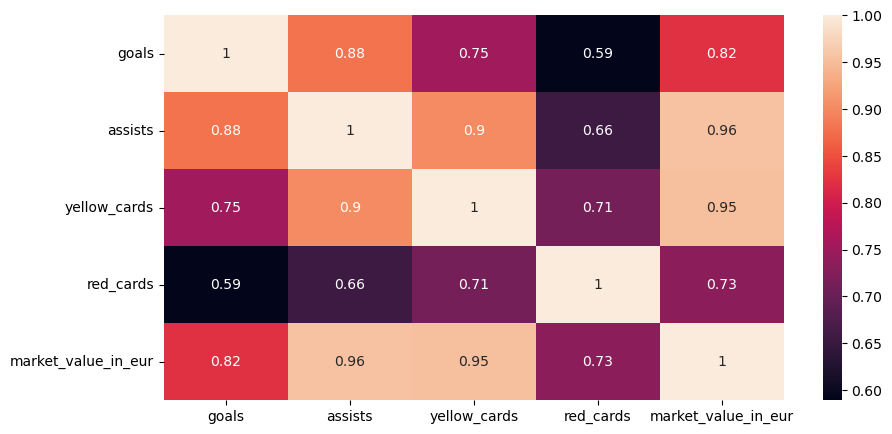

In [8]:
plt.subplots(figsize=(10,5))
sb.heatmap(df1.corr(),annot=True)

# Player Attributes and Demographics
Are there any correlations between player attributes (height, preferred foot) and on-field performance?

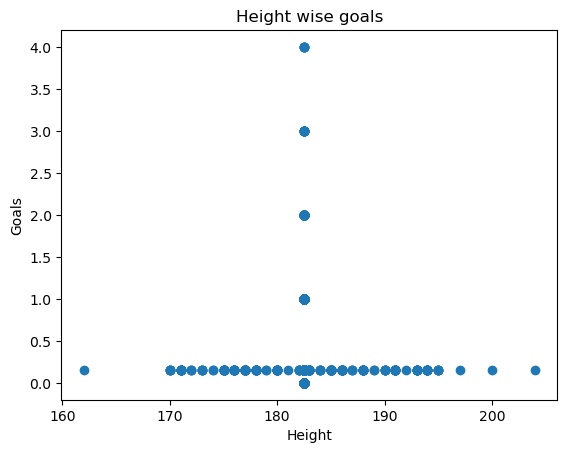

In [23]:
plt.scatter(x=data['height_in_cm'],y=data['goals'])
plt.xlabel('Height')
plt.ylabel('Goals')
plt.title('Height wise goals')
plt.show()

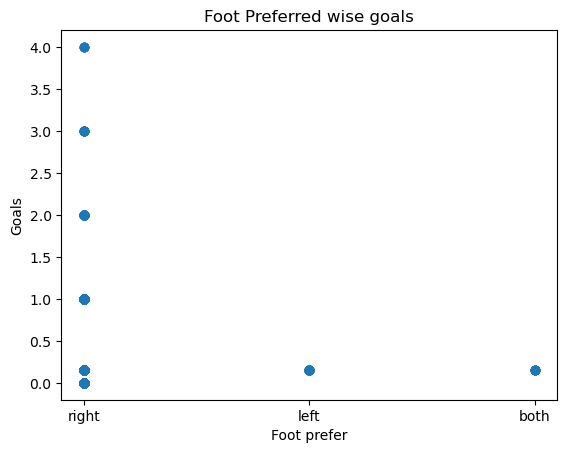

In [3]:
plt.scatter(x=data['foot'],y=data['goals'])
plt.xlabel('Foot prefer')
plt.ylabel('Goals')
plt.title('Foot Preferred wise goals')
plt.show()